In [11]:
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchaudio.datasets import SPEECHCOMMANDS
from collections import defaultdict


In [12]:
LABEL_MAP = {
    'backward': 0,
    'bed': 1,
    'bird': 2,
    'cat': 3,
    'dog': 4,
    'down': 5,
    'eight': 6,
    'five': 7,
    'follow': 8,
    'forward': 9,
    'four': 10,
    'go': 11,
    'happy': 12,
    'house': 13,
    'learn': 14,
    'left': 15,
    'marvin': 16,
    'nine': 17,
    'no': 18,
    'off': 19,
    'on': 20,
    'one': 21,
    'right': 22,
    'seven': 23,
    'sheila': 24,
    'six': 25,
    'stop': 26,
    'three': 27,
    'tree': 28,
    'two': 29,
    'up': 30,
    'visual': 31,
    'wow': 32,
    'yes': 33,
    'zero': 34
}

In [13]:
def create_dirichlet_splits(dataset: Dataset, num_trainers: int, alpha: float) -> dict:
    """
    Create splits of dataset indices according to a Dirichlet distribution.

    Args:
        dataset (Dataset): The dataset to split.
        num_trainers (int): The number of trainers.
        alpha (float): The alpha value for the Dirichlet distribution.

    Returns:
        dict: A dictionary mapping each trainer ID to a list of dataset indices.
    """
    labels = [label for _, _, label, _, _ in dataset]  # Assuming the third element is the label
    labels = np.array([LABEL_MAP[label] for label in labels])  # Convert labels to integers
    
    num_classes = len(np.unique(labels))
    label_distribution = defaultdict(list)

    # Collect indices for each class
    for idx, label in enumerate(labels):
        label_distribution[label].append(idx)

    # Create Dirichlet distribution splits
    trainer_indices = defaultdict(list)
    for label, indices in label_distribution.items():
        proportions = np.random.dirichlet([alpha] * num_trainers)
        proportions = (proportions * len(indices)).astype(int)
        np.random.shuffle(indices)
        start_idx = 0
        for i, count in enumerate(proportions):
            trainer_indices[i].extend(indices[start_idx:start_idx + count])
            start_idx += count

    return trainer_indices

In [25]:
# Example usage
if __name__ == "__main__":
    dataset = SPEECHCOMMANDS('./data', download=True, subset='training')
    num_trainers = 100
    alpha = 10
    trainer_indices = create_dirichlet_splits(dataset, num_trainers, alpha)
    print(trainer_indices)

defaultdict(<class 'list'>, {0: [922, 1120, 227, 634, 346, 49, 254, 1090, 61, 759, 1226, 663, 505, 757, 141, 1548, 1639, 2630, 2233, 2754, 1504, 2305, 2120, 2899, 1902, 1432, 2829, 2906, 1378, 3104, 3928, 4585, 3366, 4034, 3989, 4237, 3575, 4321, 3525, 3563, 4944, 6246, 6238, 5548, 5869, 4851, 5609, 5127, 5595, 4827, 5633, 7054, 7853, 7411, 6979, 6371, 6510, 6507, 6863, 7546, 6434, 6955, 7778, 6458, 7388, 6699, 6310, 8707, 9710, 8364, 9926, 9529, 9437, 10189, 8875, 10820, 10143, 9304, 8460, 8388, 9575, 8073, 8402, 9647, 8265, 9931, 8830, 9469, 9686, 10720, 10217, 10713, 10483, 9133, 10561, 13957, 11237, 14157, 12401, 11192, 11974, 13611, 13103, 13718, 13577, 13851, 11686, 11809, 12576, 13632, 13874, 13933, 13066, 13731, 11236, 12757, 12673, 11489, 13223, 11224, 12893, 11263, 11525, 11957, 12679, 14018, 11508, 13810, 14131, 15788, 16515, 16600, 14363, 15977, 14195, 16448, 14671, 14983, 14212, 14757, 15838, 16935, 15425, 14215, 15086, 16996, 15556, 14844, 15322, 15849, 14340, 16851, 1514

In [26]:
len(trainer_indices[24])

877

##### UPDATE TRAINER CONFIG with new trainer_indices_list

In [17]:
import json
import os

def update_trainer_indices_list(directory_path, trainer_indices):
    """
    Update the 'trainer_indices' property in each JSON file in the specified directory.

    Parameters:
    - directory_path (str): The path to the directory containing JSON files.
    - new_value (str): The new value for the 'trainer_indices_list' property.

    Returns:
    - None
    """
    # Loop through all files in the directory
    trainer_counter = 0
    for filename in os.listdir(directory_path):
        if filename.endswith(".json") and filename.startswith("trainer_"):
            file_path = os.path.join(directory_path, filename)

            # Read the JSON file
            with open(file_path, 'r') as json_file:
                data = json.load(json_file)

            # Add or update the "failure_durations_s" key in the "hyperparameters" dictionary
            hyperparameters = data.get("hyperparameters", {})
            hyperparameters["trainer_indices_list"] = trainer_indices[trainer_counter]
            data["hyperparameters"] = hyperparameters

            # Write the modified data back to the JSON file
            with open(file_path, 'w') as json_file:
                json.dump(data, json_file, indent=2)

            print(f"Updated {filename}")
            trainer_counter += 1

    print("Update completed.")

In [18]:
trainer_indices[0]

[715,
 944,
 1240,
 125,
 1257,
 223,
 83,
 914,
 214,
 224,
 230,
 968,
 511,
 889,
 294,
 328,
 189,
 1012,
 1317,
 412,
 1097,
 424,
 1096,
 327,
 856,
 1259,
 519,
 1007,
 429,
 89,
 199,
 975,
 912,
 971,
 92,
 241,
 786,
 618,
 1263,
 898,
 908,
 1211,
 780,
 557,
 217,
 279,
 1302,
 1318,
 1176,
 316,
 552,
 615,
 162,
 346,
 210,
 322,
 527,
 439,
 1053,
 829,
 1297,
 473,
 931,
 67,
 771,
 1080,
 824,
 302,
 402,
 842,
 1014,
 1148,
 458,
 154,
 818,
 194,
 350,
 1172,
 687,
 868,
 943,
 366,
 915,
 12,
 1045,
 283,
 1094,
 1313,
 945,
 812,
 219,
 197,
 602,
 675,
 907,
 4290,
 3400,
 4395,
 4002,
 3737,
 3416,
 3667,
 2945,
 4490,
 3301,
 4202,
 3462,
 4541,
 3957,
 5647,
 4860,
 5581,
 5585,
 5062,
 5551,
 5779,
 5772,
 6169,
 5327,
 5403,
 5000,
 5015,
 5378,
 5427,
 5621,
 5100,
 5941,
 5556,
 4706,
 5673,
 6043,
 4878,
 4788,
 5332,
 5457,
 6112,
 5045,
 4999,
 5472,
 5271,
 5703,
 5005,
 4640,
 5022,
 6146,
 4883,
 5165,
 5720,
 5685,
 5265,
 5604,
 4939,
 5141,
 6222,


In [27]:
# Replace with the actual path to your directory

directory_path = "config_dir10_num100_traceFail_48h_oort"
update_trainer_indices_list(directory_path, trainer_indices)

Updated trainer_5.json
Updated trainer_76.json
Updated trainer_94.json
Updated trainer_44.json
Updated trainer_74.json
Updated trainer_82.json
Updated trainer_50.json
Updated trainer_39.json
Updated trainer_4.json
Updated trainer_18.json
Updated trainer_64.json
Updated trainer_52.json
Updated trainer_51.json
Updated trainer_63.json
Updated trainer_36.json
Updated trainer_73.json
Updated trainer_87.json
Updated trainer_62.json
Updated trainer_24.json
Updated trainer_95.json
Updated trainer_91.json
Updated trainer_45.json
Updated trainer_30.json
Updated trainer_1.json
Updated trainer_100.json
Updated trainer_8.json
Updated trainer_90.json
Updated trainer_49.json
Updated trainer_72.json
Updated trainer_83.json
Updated trainer_7.json
Updated trainer_68.json
Updated trainer_11.json
Updated trainer_29.json
Updated trainer_47.json
Updated trainer_14.json
Updated trainer_59.json
Updated trainer_34.json
Updated trainer_17.json
Updated trainer_78.json
Updated trainer_33.json
Updated trainer_43.j

##### CREATE NEW trainer jsons with new trainer_indices_list

In [9]:
import json
import os

def create_trainer_configs(base_config_path, trainer_indices, output_dir, num_trainers=100):
    # Read the base configuration file
    with open(base_config_path, 'r') as base_config_file:
        base_config = json.load(base_config_file)

    # Iterate over the number of trainers
    for i in range(1, num_trainers + 1):
        # Update the trainer_indices_list field in the configuration
        base_config['hyperparameters']['trainer_indices_list'] = trainer_indices.get(i-1, [])

        # Create the new configuration file name
        new_config_path = os.path.join(output_dir, f'trainer_{i}.json')

        # Write the updated configuration to the new file
        with open(new_config_path, 'w') as new_config_file:
            json.dump(base_config, new_config_file, indent=4)

        print(f"Updated trainer_{i}.json")

In [22]:
# Example usage
base_config_path = 'config_dir0.1_num300_traceFail_48h/base_config.json'
output_dir = 'config_dir0.1_num300_traceFail_48h'


# NOTE: THIS WILL CREATE NEW CONFIGS. 
# ###### DO THIS ONLY IF TRAINER DOESNT EXIST. IF IT DOES, IT WILL BE OVERWRITTEN
create_trainer_configs(base_config_path, trainer_indices, output_dir, num_trainers=300)

Updated trainer_1.json
Updated trainer_2.json
Updated trainer_3.json
Updated trainer_4.json
Updated trainer_5.json
Updated trainer_6.json
Updated trainer_7.json
Updated trainer_8.json
Updated trainer_9.json
Updated trainer_10.json
Updated trainer_11.json
Updated trainer_12.json
Updated trainer_13.json
Updated trainer_14.json
Updated trainer_15.json
Updated trainer_16.json
Updated trainer_17.json
Updated trainer_18.json
Updated trainer_19.json
Updated trainer_20.json
Updated trainer_21.json
Updated trainer_22.json
Updated trainer_23.json
Updated trainer_24.json
Updated trainer_25.json
Updated trainer_26.json
Updated trainer_27.json
Updated trainer_28.json
Updated trainer_29.json
Updated trainer_30.json
Updated trainer_31.json
Updated trainer_32.json
Updated trainer_33.json
Updated trainer_34.json
Updated trainer_35.json
Updated trainer_36.json
Updated trainer_37.json
Updated trainer_38.json
Updated trainer_39.json
Updated trainer_40.json
Updated trainer_41.json
Updated trainer_42.json
U

In [23]:
trainer_indices[0]

[6293,
 5467,
 5812,
 5712,
 4719,
 4681,
 6073,
 6185,
 4903,
 5132,
 5206,
 5988,
 5320,
 5279,
 7401,
 25943,
 24701,
 23725,
 23190,
 25268,
 25842,
 24565,
 24695,
 25655,
 25115,
 23954,
 24039,
 24965,
 24839,
 25359,
 25533,
 24204,
 25995,
 24387,
 24090,
 25581,
 24734,
 25014,
 23323,
 23987,
 24536,
 25816,
 23293,
 25915,
 23215,
 25651,
 23254,
 24376,
 24960,
 23007,
 25496,
 24413,
 23892,
 25283,
 25957,
 23058,
 25521,
 25249,
 25490,
 24176,
 23500,
 24493,
 24172,
 25435,
 22920,
 22900,
 25566,
 23788,
 23683,
 23203,
 25530,
 23468,
 23543,
 24806,
 52647,
 51044,
 53210,
 53867,
 53097,
 52688,
 51862,
 51377,
 52983,
 52240,
 52839,
 51178,
 53666,
 51675,
 53902,
 51060,
 51318,
 52001,
 53629,
 53319,
 51186,
 53557,
 52303,
 51964,
 52494,
 51062,
 53519,
 51694,
 51856,
 52562,
 53387,
 52348,
 58228,
 58186,
 57981,
 58157,
 58067,
 57750,
 57605,
 58705,
 57990,
 64469,
 62640,
 63467,
 63928,
 64317,
 63365,
 64271,
 63131,
 62415,
 63155,
 64589,
 62608,

#### Updating trainer IDs

In [25]:
def update_taskid_in_json_files(directory, num_clients):
    for i in range(1, num_clients+1):
        file_name = f"trainer_{i}.json"
        file_path = os.path.join(directory, file_name)
        
        with open(file_path, 'r') as file:
            data = json.load(file)
        
        # Get the current taskid and modify the last 3 characters
        current_taskid = data.get("taskid", "")
        new_taskid = current_taskid[:-3] + str(370 + i - 1)
        data["taskid"] = new_taskid
        
        with open(file_path, 'w') as file:
            json.dump(data, file, indent=4)

    print("Update completed")

In [26]:
# Example usage
directory = 'config_dir100_num300_traceFail_48h'
update_taskid_in_json_files(directory, num_clients=300)

Update completed


### Incorporating failure trace

In [25]:
import pandas as pd
import math
import os
import json
import numpy as np

In [26]:
client_behave_trace_path = '../../mobiperf_device_info_trace/'
client_behavior = pd.read_pickle(os.path.join(client_behave_trace_path, "client_behave_trace"))

In [27]:
client_behavior[2]

{'duration': 691032,
 'inactive': [12823, 658127, 685128, 715053, 765786, 843740, 917249, 917251],
 'finish_time': 950400,
 'active': [10596, 12885, 683099, 713791, 750327, 834323, 901855, 917249],
 'model': 'CPH1909'}

In [28]:
len(client_behavior)

107749

In [69]:
# NOTE: Check these values
NUM_CLIENTS = 300
EXPT_DURATION_S = 2*24*60*60          # num_days * 24 * 60 * 60 seconds
RNG_SEED = 42

# select more clients from the failure trace so that you can remove
# all trace conversions that fall >2% off the original client behavior
OVERSAMPLING_CLIENT_RATIO = 2
MAX_TOLERABLE_ERROR = 2

print("EXPT_DURATION_S: ", EXPT_DURATION_S)

EXPT_DURATION_S:  172800


In [70]:
def getListDeviceIDs(num_clients_to_pick, client_behavior_trace):
    np.random.seed(RNG_SEED)
    picked_client_ids = np.random.choice(range(1, len(client_behavior_trace)), num_clients_to_pick)
    
    return picked_client_ids

# Pick 2 times the num_clients so that those clients whose error is > 3% can be skipped
picked_client_ids = getListDeviceIDs(num_clients_to_pick = int(OVERSAMPLING_CLIENT_RATIO * NUM_CLIENTS), client_behavior_trace = client_behavior)

print("Picked num of clients after oversampling: ", len(picked_client_ids))

Picked num of clients after oversampling:  600


In [71]:
def scaleTimestamps(list_timestamps, start_ts, end_ts, experiment_duration):
    list_updated_ts = []
    for ts in list_timestamps:
        updated_ts = math.floor(((ts - start_ts)/end_ts)*experiment_duration)
#         updated_ts = ts
        list_updated_ts.append(updated_ts)
    
    return list_updated_ts

In [72]:
def alternating_state_change(data):
    result = []
    current_state = None
    current_sum = 0

    for item_type, item_value in data:
        if current_state is None:
            current_state = item_type

        if item_type == current_state:
            current_sum = item_value # if two values of same state, take the latter value [lower avg error, higher peak error]
#             continue # if two values of same state, take earlier value [higher avg error, lower peak error]
        else:
            result.append((current_state, current_sum))
            current_state = item_type
            current_sum = item_value

    result.append((current_state, current_sum))
    return result

In [73]:
def get_unavailability_durations(data):
    result = []
    current_unavailability = 0
    ends_at_inactive = False
    
    for idx, (item_type, item_value) in enumerate(data):
        if item_type == "A":
            continue
        elif item_type == "I" and ((idx+1) != len(data)) and (data[idx+1][0] == "A"):
            unavail_start_ts = item_value
            unavail_duration_s = data[idx+1][1] - item_value
            result.append((unavail_start_ts, unavail_duration_s))
    
    if data[len(data)-1][0] == "I":
        ends_at_inactive = True
        
    return result, ends_at_inactive

In [74]:
def compute_total_unavailability(data):
    total_unavail = 0
    for start_ts, unavail_duration in data:
        total_unavail += unavail_duration
    
    return total_unavail

In [75]:
def actual_unavailability(client_id, client_behavior_trace):
    curr_client = client_behavior_trace[client_id]
    end_ts = curr_client['finish_time']
    avail_duration = curr_client['duration']
    start_ts = min(curr_client['active'][0], curr_client['inactive'][0])
    actual_unavail_duration = end_ts - start_ts - avail_duration
    
    percent_unavailable = actual_unavail_duration/(end_ts - start_ts)
    return percent_unavailable

In [76]:
def add_buffer_for_failure(shift_times_by_s, unavail_list):
    for idx, (unavail_start_ts, unavail_duration_s) in enumerate(unavail_list):
        updated_unavail_start_ts = unavail_start_ts + shift_times_by_s
        
        unavail_list[idx] = (updated_unavail_start_ts, unavail_duration_s)
    return unavail_list

In [77]:
def merge_contiguous_blocks(intervals):
    if not intervals:
        return []
    
    merged_intervals = []
    # Initialize with the first interval
    current_start, current_length = intervals[0]

    # Iterate through the rest of the intervals
    for start, length in intervals[1:]:
        if current_start + current_length == start:
            # Merge the intervals
            current_length += length
        else:
            # Save the current interval and move to the next
            merged_intervals.append((current_start, current_length))
            current_start, current_length = start, length

    # Append the last interval
    merged_intervals.append((current_start, current_length))

    return merged_intervals

In [78]:
def get_client_unavail_list(curr_client_id, client_behavior_trace, experiment_duration):
    # get client element from the dict
    client_desc = client_behavior_trace[curr_client_id]
    
    # finish -> end
    # start -> min(active, inactive)
    end_ts = client_desc['finish_time']
    start_ts = min(client_desc['active'][0], client_desc['inactive'][0])
#     print("overall days duration: ", (end_ts-start_ts)/86400)
    
    # scale current vectors to (0, expt_duration)
    updated_active_ts = []
    updated_inactive_ts = []
    
    updated_active_ts = scaleTimestamps(client_desc['active'], start_ts, end_ts, experiment_duration)
    updated_inactive_ts = scaleTimestamps(client_desc['inactive'], start_ts, end_ts, experiment_duration)
#     print("updated_active_ts: ", updated_active_ts, "\n updated_inactive_ts: ", updated_inactive_ts)
    
    
    # linearize the list with active inactive
    all_events = []
    
    # add end_ts too for one more check
    for ts in updated_active_ts:
        label = 'A'
        curr_timestamp_state = (label, ts)
        all_events.append(curr_timestamp_state)
    
    for ts in updated_inactive_ts:
        label = 'I'
        curr_timestamp_state = (label, ts)
        all_events.append(curr_timestamp_state)
    
    # sort this list based on timestamp which is at index 1
    all_events.sort(key = lambda x: x[1])
#     print("all_events: ", all_events)
    
    # get the values as alternating state change A->I->A...
    updated_events = alternating_state_change(all_events)
#     print("updated_events: ", updated_events)
    
    # get it in the format (next_failure_timestamp, duration_of_failure)
    # for each inactive->active transition, add an entry
    inactive_with_duration, ends_at_inactive = get_unavailability_durations(updated_events)
    
    # Add an entry for inactive->end
    if(ends_at_inactive):
        last_inactive_start_ts = updated_events[len(updated_events)-1][1]
        last_inactive_duration = experiment_duration - last_inactive_start_ts
        inactive_with_duration.append((last_inactive_start_ts, last_inactive_duration))
    
    # can do processing of inactive_with_duration here to convert
    # non-contiguous blocks of time into contiguous. Eg. [(10,1), (11, 10)] => [(10, 11)]
    merged_inactive_with_duration = merge_contiguous_blocks(inactive_with_duration)
    
    # calculate the unavailability on scaled and original
    scaled_unavail = round((compute_total_unavailability(merged_inactive_with_duration)/EXPT_DURATION_S)*100, 2)
    actual_unavail = round((actual_unavailability(client_id = curr_client_id, 
                                           client_behavior_trace = client_behavior_trace))*100, 2)
    
    # calculate error percent on error
    error_percent = round(abs(scaled_unavail-actual_unavail), 2)
    
    print("scaled vs actual unavail: ", scaled_unavail, ", ", 
          actual_unavail, " client_id: ", curr_client_id, ", error_percent: ", error_percent)
    
    # add 10s buffer so that trainers don't fail immediately at the start
    # NOTE: Tried temporary fix of 0 shift so that unaware gets correct representation
    # But seems to start from high avail (80%) in the trace itself, so will keep 0s.
    merged_inactive_with_duration = add_buffer_for_failure(shift_times_by_s = 0, unavail_list = merged_inactive_with_duration)
    
    return merged_inactive_with_duration, error_percent

In [79]:
client = 861
inactive_with_duration, error_percent = get_client_unavail_list(curr_client_id = client, 
                          client_behavior_trace = client_behavior, 
                          experiment_duration = EXPT_DURATION_S)

scaled vs actual unavail:  78.62 ,  59.7  client_id:  861 , error_percent:  18.92


In [80]:
avg_error_percent = 0
total_error_percent = 0
trainer_id = 0
trainer_to_inactivity_dict = {}
total_clients_with_excessive_error = 0

for client in picked_client_ids:
    inactive_with_duration, error_percent = get_client_unavail_list(curr_client_id = client, 
                          client_behavior_trace = client_behavior, 
                          experiment_duration = EXPT_DURATION_S)
    if error_percent > MAX_TOLERABLE_ERROR:
        total_clients_with_excessive_error += 1
        print("Client error was: ", error_percent, ", thus skipping")
        if total_clients_with_excessive_error > ((OVERSAMPLING_CLIENT_RATIO - 1) * NUM_CLIENTS):
            print("ERROR! Need to sample more clients, too many clients with excessive error")
            break
        continue
    trainer_id += 1
    total_error_percent += error_percent
    trainer_to_inactivity_dict[trainer_id] = inactive_with_duration
    
    if trainer_id == NUM_CLIENTS:
        print("COMPLETED PROCESSING OF ", NUM_CLIENTS, " clients. Exiting.")
        break

avg_error_percent = round(total_error_percent/len(picked_client_ids),2)
print("avg_error_percent: ", avg_error_percent)

scaled vs actual unavail:  67.23 ,  67.12  client_id:  15796 , error_percent:  0.11
scaled vs actual unavail:  78.62 ,  59.7  client_id:  861 , error_percent:  18.92
Client error was:  18.92 , thus skipping
scaled vs actual unavail:  97.22 ,  94.83  client_id:  103695 , error_percent:  2.39
Client error was:  2.39 , thus skipping
scaled vs actual unavail:  77.55 ,  77.42  client_id:  76821 , error_percent:  0.13
scaled vs actual unavail:  89.66 ,  75.26  client_id:  54887 , error_percent:  14.4
Client error was:  14.4 , thus skipping
scaled vs actual unavail:  72.61 ,  53.39  client_id:  6266 , error_percent:  19.22
Client error was:  19.22 , thus skipping
scaled vs actual unavail:  96.46 ,  92.4  client_id:  82387 , error_percent:  4.06
Client error was:  4.06 , thus skipping
scaled vs actual unavail:  78.95 ,  76.83  client_id:  37195 , error_percent:  2.12
Client error was:  2.12 , thus skipping
scaled vs actual unavail:  94.74 ,  93.9  client_id:  87499 , error_percent:  0.84
scale

In [81]:
client_behavior[861]

{'duration': 278207,
 'inactive': [939,
  2004,
  4627,
  4641,
  5121,
  5261,
  5392,
  29043,
  29367,
  29384,
  29399,
  29409,
  69698,
  69759,
  73667,
  77654,
  80984,
  81932,
  84142,
  96113,
  96310,
  115278,
  115294,
  117166,
  119775,
  119794,
  119795,
  120029,
  120039,
  127037,
  127044,
  132052,
  132320,
  140370,
  143050,
  143052,
  144004,
  145149,
  145890,
  146596,
  146807,
  148111,
  152605,
  158043,
  158064,
  158218,
  158229,
  158306,
  159656,
  159669,
  166592,
  166596,
  172674,
  172683,
  202561,
  228456,
  228466,
  229476,
  229837,
  229923,
  241842,
  241851,
  310193,
  310406,
  313706,
  316184,
  317165,
  343005,
  344469,
  389391,
  406422,
  406545,
  406561,
  406675,
  406751,
  406768,
  406784,
  406873,
  406889,
  406938,
  406957,
  406975,
  406990,
  407001,
  407042,
  407084,
  407113,
  407143,
  407158,
  407176,
  407201,
  407220,
  409128,
  415049,
  417703,
  418001,
  419264,
  420102,
  420158,
  4726

In [82]:
len(client_behavior[15796]['active'])

22

In [83]:
len(client_behavior[15796]['inactive'])

22

In [84]:
inactive_with_duration, error_percent = get_client_unavail_list(curr_client_id = 16024, 
                          client_behavior_trace = client_behavior, 
                          experiment_duration = EXPT_DURATION_S)

scaled vs actual unavail:  84.19 ,  67.33  client_id:  16024 , error_percent:  16.86


In [85]:
len(trainer_to_inactivity_dict)

300

In [86]:
trainer_to_inactivity_dict[1]

[(487, 11340),
 (15786, 13096),
 (34990, 13631),
 (49819, 1),
 (51395, 185),
 (52039, 538),
 (52669, 2703),
 (55379, 4),
 (66586, 14594),
 (87145, 30117),
 (117268, 1),
 (119203, 88),
 (119784, 2265),
 (122534, 135),
 (122687, 5),
 (122848, 14),
 (125937, 19243),
 (146590, 9),
 (154858, 9),
 (156394, 6072),
 (170682, 2118)]

#### Visualize the trainer availability of mobiperf trace

In [87]:
import matplotlib.pyplot as plt

def count_active_trainers(trainer_to_inactivity_dict, max_timestamp=EXPT_DURATION_S):
    # Initialize the list to hold the number of active trainers at each timestamp
    active_trainers_count = []

    # Iterate through each timestamp
    for timestamp in range(max_timestamp + 1):
        active_count = 0
        # Check each trainer's inactivity periods
        for inactivity_periods in trainer_to_inactivity_dict.values():
            is_active = True
            for start, duration in inactivity_periods:
                end = start + duration
                if start <= timestamp < end:
                    is_active = False
                    break
            if is_active:
                active_count += 1
        active_trainers_count.append(active_count)

    return active_trainers_count

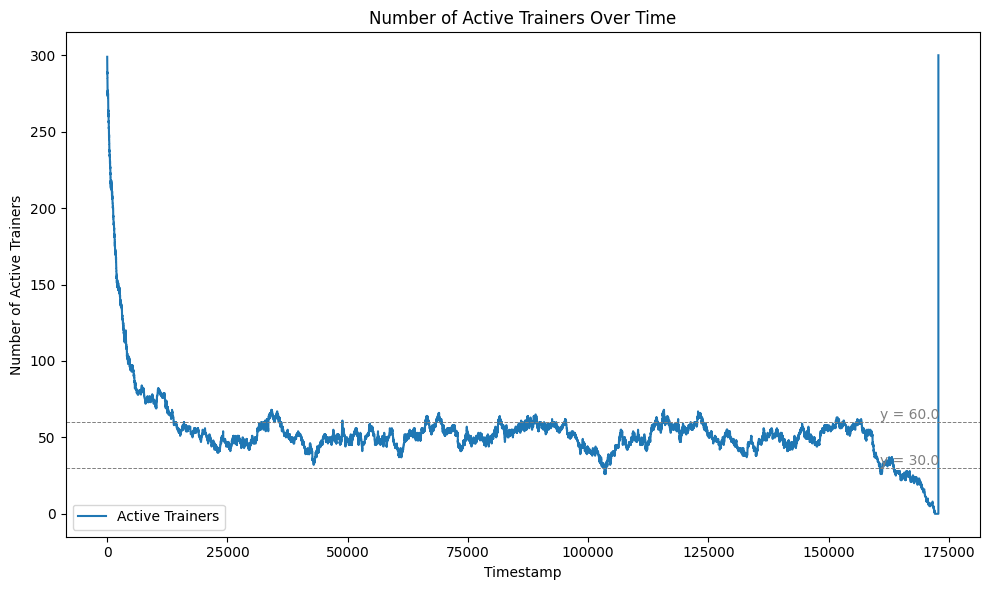

In [88]:
def plot_active_trainers(active_trainers_count, max_timestamp=EXPT_DURATION_S):
    # Plot the number of active trainers over time
    plt.figure(figsize=(10, 6))
    plt.plot(range(max_timestamp + 1), active_trainers_count, label='Active Trainers')
    
    # Add horizontal lines with labels at y = 10, y = 20
    for y_value in [0.1*NUM_CLIENTS, 0.2*NUM_CLIENTS]:
        plt.axhline(y=y_value, color='grey', linestyle='--', linewidth=0.7)
        plt.text(max_timestamp + 200, y_value, f'y = {y_value}', color='grey', 
                 verticalalignment='bottom', horizontalalignment='right')

    plt.xlabel('Timestamp')
    plt.ylabel('Number of Active Trainers')
    plt.title('Number of Active Trainers Over Time')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Calculate active trainers count
active_trainers_count = count_active_trainers(trainer_to_inactivity_dict)

# Plot the active trainers count
plot_active_trainers(active_trainers_count)

In [96]:
plt.rcParams.update({
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'figure.figsize': [6, 4]
})

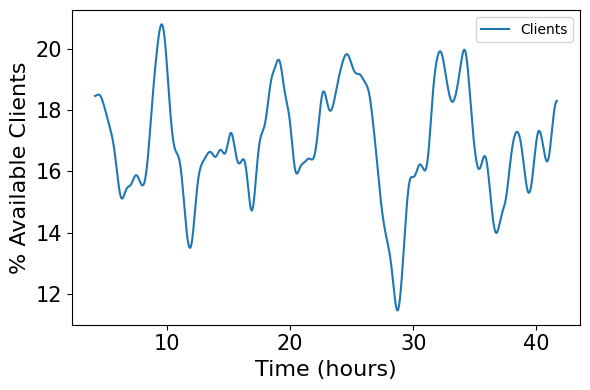

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Assuming active_trainers_count is your list with 172800 values
# active_trainers_count = [...]

# Define the range and normalize the values
start_index = 15000
end_index = 150000
normalized_values = np.array(active_trainers_count[start_index:end_index]) / 3

# Convert timestamps from seconds to hours
timestamps = np.arange(start_index, end_index) / 3600

# Apply smoothing with a Gaussian filter
smoothing_factor = 1000  # Adjust this value as needed for smoothing
smoothed_values = gaussian_filter1d(normalized_values, sigma=smoothing_factor)

# Create the plot
# plt.figure(figsize=(10, 5))
plt.plot(timestamps, smoothed_values, label='Clients')

# Add labels and legend
plt.xlabel('Time (hours)')
plt.ylabel('% Available Clients')
plt.legend()

plt.tight_layout()
# Save the plot as a PDF
plt.savefig("mobiperf_48hour_trace.pdf", format='pdf')

# Show the plot
# plt.title('Normalized Active Trainers Count Over Time')
# plt.grid(True)
plt.show()

#### Verify that the next failure duration is always greater than the sum of the previous failure_start and failure duration

In [122]:
def check_tuples(trainer_to_inactivity_dict):
    for key, tuples_list in trainer_to_inactivity_dict.items():
        for i in range(1, len(tuples_list)):
            current_tuple = tuples_list[i]
            previous_tuple = tuples_list[i - 1]
            if current_tuple[0] <= sum(previous_tuple):
                print(f"False: Failed at key {key}")
                return False
    print("True: All tuples pass the test.")
    return True

# Call the function
check_tuples(trainer_to_inactivity_dict)


True: All tuples pass the test.


True

##### Fix the trainer avail duration (remove initial long period of >25% avail)

In [225]:
def find_first_low_trainer_index(active_trainers_count):
    if not active_trainers_count:
        return -1  # Return -1 if the list is empty
    
    threshold = 0.25 * active_trainers_count[0]  # Calculate 20% of the first value
    
    for index, count in enumerate(active_trainers_count):
        if count <= threshold:
            return index  # Return the first index where the condition is met
    
    return -1  # Return -1 if no such index is found

# NOTE: We remove upto the point where we have 100->20% availability
# dip. 
dipped_to_25_at_ts = find_first_low_trainer_index(active_trainers_count)
print("Dipped to < 25% percent avail at index", dipped_to_25_at_ts)

Dipped to < 25% percent avail at index 7876


#### Fix the trainer inactive durations using the index found above

In [226]:
import random

def update_inactivity_dict(trainer_to_inactivity_dict, index):
    updated_dict = {}
    
    for trainer_id, unavailability_list in trainer_to_inactivity_dict.items():
        # First pass: Remove elements where unavailability_start + unavailability_duration < index
        filtered_list = [
            (start, duration) for start, duration in unavailability_list 
            if start + duration >= index
        ]
        
        # Second pass: Subtract the index value from unavailability_start of each element
        # wherever start is greater than the index
        # If start < index, replace start by 1 which means that the
        # trainer will be alive for the first (1,30) seconds and then go
        # unavailable.
        updated_list = [
            (
                (start - index) if start > index else random.randint(1, 30), 
                (duration - index) if (start < index and duration > index) else (start+duration)-index-30 if (
                    start < index and duration < index
                    )
                else duration
            ) for start, duration in filtered_list
        ]
        
        updated_dict[trainer_id] = updated_list
    
    return updated_dict

updated_trainer_inactivity_dict = update_inactivity_dict(trainer_to_inactivity_dict, dipped_to_25_at_ts)

In [227]:
def verify_and_find_min_value(updated_dict):
    min_value = float('inf')  # Initialize with positive infinity
    no_negative_values = True

    for trainer_id, unavailability_list in updated_dict.items():
        for start, duration in unavailability_list:
            if start < 0 or duration < 0:
                no_negative_values = False
            if start < min_value:
                min_value = start
            if duration < min_value:
                min_value = duration

    if no_negative_values:
        print("No negative values found.")
    else:
        print("Negative values found.")

    print(f"The minimum value across all values is: {min_value}")
    
    return no_negative_values, min_value

no_negatives, min_val = verify_and_find_min_value(updated_trainer_inactivity_dict)

No negative values found.
The minimum value across all values is: 1


In [228]:
trainer_to_inactivity_dict[1]

[(487, 11340),
 (15786, 13096),
 (34990, 13631),
 (49819, 1),
 (51395, 185),
 (52039, 538),
 (52669, 2703),
 (55379, 4),
 (66586, 14594),
 (87145, 30117),
 (117268, 1),
 (119203, 88),
 (119784, 2265),
 (122534, 135),
 (122687, 5),
 (122848, 14),
 (125937, 19243),
 (146590, 9),
 (154858, 9),
 (156394, 6072),
 (170682, 2118)]

In [229]:
updated_trainer_inactivity_dict[1]

[(26, 3464),
 (7910, 13096),
 (27114, 13631),
 (41943, 1),
 (43519, 185),
 (44163, 538),
 (44793, 2703),
 (47503, 4),
 (58710, 14594),
 (79269, 30117),
 (109392, 1),
 (111327, 88),
 (111908, 2265),
 (114658, 135),
 (114811, 5),
 (114972, 14),
 (118061, 19243),
 (138714, 9),
 (146982, 9),
 (148518, 6072),
 (162806, 2118)]

In [230]:
dipped_to_25_at_ts

7876

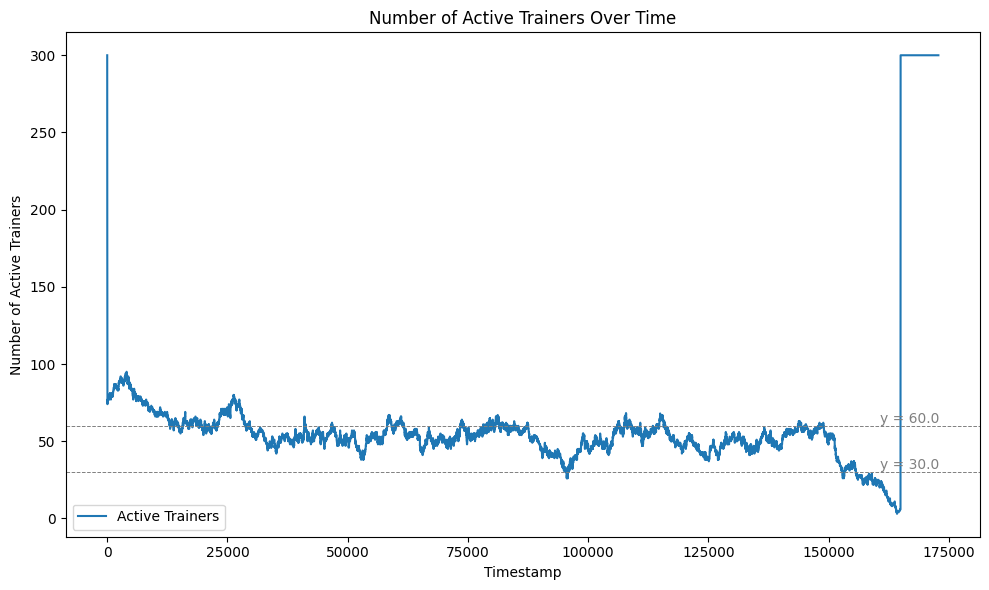

In [231]:
# Verify the new availability distribution
# Calculate active trainers count
updated_active_trainers_count = count_active_trainers(updated_trainer_inactivity_dict)

# Plot the active trainers count
plot_active_trainers(updated_active_trainers_count)

In [232]:
### Do the sanity check for the tuples in the list again, with the updated trainer_unavail_dict

# Call the function
check_tuples(updated_trainer_inactivity_dict)

True: All tuples pass the test.


True

In [233]:
trainer_to_inactivity_dict[194]

[(1563, 6432),
 (8000, 14),
 (8354, 1),
 (13604, 15854),
 (36828, 17058),
 (55576, 23368),
 (80899, 1),
 (81667, 24349),
 (107155, 637),
 (111276, 30849),
 (152301, 20499)]

In [234]:
updated_trainer_inactivity_dict[194]

[(30, 89),
 (124, 14),
 (478, 1),
 (5728, 15854),
 (28952, 17058),
 (47700, 23368),
 (73023, 1),
 (73791, 24349),
 (99279, 637),
 (103400, 30849),
 (144425, 20499)]

### Add the inactive durations to config files

In [253]:
def update_failure_durations(directory_path, trainer_to_inactivity_dict, noFail):
    """
    Update the 'failure_durations_s' property in each JSON file in the specified directory.

    Parameters:
    - directory_path (str): The path to the directory containing JSON files.
    - new_value (str): The new value for the 'failure_durations_s' property.

    Returns:
    - None
    """
    # Loop through all files in the directory
    trainer_counter = 1
    for filename in os.listdir(directory_path):
        if filename.endswith(".json") and filename.startswith("trainer_"):
            file_path = os.path.join(directory_path, filename)

            # Read the JSON file
            with open(file_path, 'r') as json_file:
                data = json.load(json_file)

            # Add or update the "failure_durations_s" key in the "hyperparameters" dictionary
            hyperparameters = data.get("hyperparameters", {})
            if noFail == True:
                hyperparameters["failure_durations_s"] = str([])
            elif noFail == False:
                hyperparameters["failure_durations_s"] = str(trainer_to_inactivity_dict[trainer_counter])
            data["hyperparameters"] = hyperparameters

            # Write the modified data back to the JSON file
            with open(file_path, 'w') as json_file:
                json.dump(data, json_file, indent=2)

            print(f"Updated {filename}")
            trainer_counter += 1

    print(f"Update completed for {trainer_counter-1} trainers.")

In [255]:
# Replace with the actual path to your directory
directory_path = "config_dir100_num300_traceFail_48h"  
update_failure_durations(directory_path, updated_trainer_inactivity_dict, noFail=False)

# directory_path = "/Users/dhruv/Documents/Academics/Summer_23/Dist_training_fault_tolerance/expt_configs/config_dir1_num200_noFail"  # Replace with the actual path to your directory
# update_failure_durations(directory_path, trainer_to_inactivity_dict, True)

Updated trainer_244.json
Updated trainer_65.json
Updated trainer_77.json
Updated trainer_81.json
Updated trainer_284.json
Updated trainer_72.json
Updated trainer_258.json
Updated trainer_224.json
Updated trainer_236.json
Updated trainer_293.json
Updated trainer_40.json
Updated trainer_198.json
Updated trainer_216.json
Updated trainer_75.json
Updated trainer_168.json
Updated trainer_125.json
Updated trainer_290.json
Updated trainer_215.json
Updated trainer_207.json
Updated trainer_283.json
Updated trainer_78.json
Updated trainer_176.json
Updated trainer_174.json
Updated trainer_146.json
Updated trainer_19.json
Updated trainer_225.json
Updated trainer_169.json
Updated trainer_162.json
Updated trainer_246.json
Updated trainer_203.json
Updated trainer_232.json
Updated trainer_165.json
Updated trainer_229.json
Updated trainer_83.json
Updated trainer_89.json
Updated trainer_147.json
Updated trainer_245.json
Updated trainer_94.json
Updated trainer_28.json
Updated trainer_92.json
Updated train

In [69]:
trainer_to_inactivity_dict.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [128]:
updated_trainer_inactivity_dict[245]

[(3496, 34018),
 (39490, 3252),
 (44089, 12869),
 (59231, 47154),
 (107894, 34648),
 (142564, 10),
 (145985, 1228),
 (151435, 13489)]

In [129]:
trainer_to_inactivity_dict[245]

[(11372, 34018),
 (47366, 3252),
 (51965, 12869),
 (67107, 47154),
 (115770, 34648),
 (150440, 10),
 (153861, 1228),
 (159311, 13489)]

### Incorporating the training delays

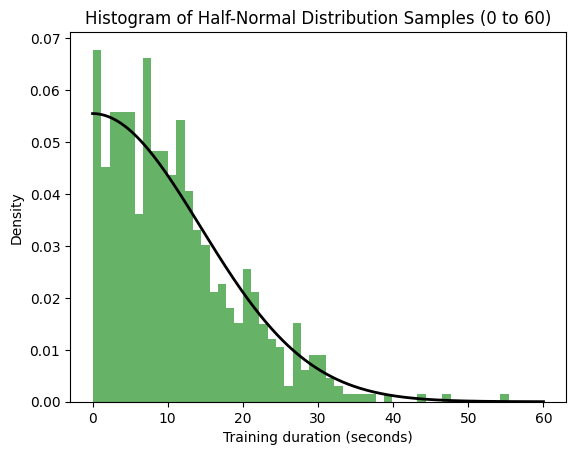

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import halfnorm

# Desired range
min_value = 0
max_value = 60

# Set the seed for reproducibility
np.random.seed(42)

# Calculate standard deviation for a normal distribution covering the range
std_dev = (max_value - min_value) / (2 * np.sqrt(2 * np.log(2)))

# Adjust the scale parameter for the half-normal distribution
scale = std_dev / np.sqrt(np.pi)

# Sample NUM_CLIENTS points from the adjusted half-normal distribution
samples = halfnorm.rvs(scale=scale, size=NUM_CLIENTS*2)

# Plot the histogram of the sampled data points
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g')

# Plot the theoretical PDF for comparison
x = np.linspace(min_value, max_value, 1000)
pdf = halfnorm.pdf(x, scale=scale)
plt.plot(x, pdf, 'k', linewidth=2)

plt.title('Histogram of Half-Normal Distribution Samples (0 to 60)')
plt.xlabel('Training duration (seconds)')
plt.ylabel('Density')
plt.show()

In [138]:
std_dev

25.479654008640573

In [139]:
# samples generated are floating point nos. Convert them to ceil int
ceil_time_from_samples = np.ceil(samples)
ceil_time_from_samples

array([ 8.,  2., 10., 22.,  4.,  4., 23., 12.,  7.,  8.,  7.,  7.,  4.,
       28., 25.,  9., 15.,  5., 14., 21., 22.,  4.,  1., 21.,  8.,  2.,
       17.,  6.,  9.,  5.,  9., 27.,  1., 16., 12., 18.,  4., 29., 20.,
        3., 11.,  3.,  2.,  5., 22., 11.,  7., 16.,  5., 26.,  5.,  6.,
       10.,  9., 15., 14., 13.,  5.,  5., 15.,  7.,  3., 16., 18., 12.,
       20.,  2., 15.,  6., 10.,  6., 23.,  1., 23., 38., 12.,  2.,  5.,
        2., 29.,  4.,  6., 22.,  8., 12.,  8., 14.,  5.,  8.,  8.,  2.,
       14., 11.,  5.,  6., 22.,  5.,  4.,  1.,  4., 21.,  7.,  5., 12.,
        3.,  6., 28.,  3.,  4.,  2., 28.,  1.,  1., 36.,  3.,  5.,  1.,
       17., 17., 11., 12., 14., 21., 21.,  9., 32., 15.,  9.,  2.,  8.,
       23.,  1., 16.,  7., 14., 23., 12.,  5., 12., 18.,  4., 19., 24.,
        3.,  4., 12., 18., 19.,  8.,  5.,  4.,  5., 10.,  4.,  5., 11.,
       27.,  7., 18., 10., 15., 12., 17., 12., 14.,  6., 12., 28.,  4.,
       11., 13., 12.,  2.,  5.,  4., 12.,  1., 21.,  4., 40.,  9

In [140]:
# get avg runtime from samples. 
# NOTE: It will be used by new joining OORT trainers for their initial runtime.
np.mean(ceil_time_from_samples)

# 100 clients -> avg runtime 10.93s
# 1000 clients -> 11.7s
# 10000 clients -> 11.99 =======> Using this value of 12s since it will fit upto large num_clients

11.601666666666667

In [143]:
# NOTE: Need a runtime >= 2 seconds. So will drop all the 1 values
# fron the list
ceil_time_from_samples = ceil_time_from_samples[ceil_time_from_samples != 1]

print("Minimum delay duration is: ", min(ceil_time_from_samples))

Minimum delay duration is:  2.0


In [144]:
trainer_to_delay_s_dict = {}
for i in range(1, NUM_CLIENTS+1):
    trainer_to_delay_s_dict[i] = ceil_time_from_samples[i-1]

In [145]:
def update_delay_durations(directory_path, trainer_to_delay_s_dict):
    """
    Update the 'delay_durations_s' property in each JSON file in the specified directory.

    Parameters:
    - directory_path (str): The path to the directory containing JSON files.
    - new_value (str): The new value for the 'failure_durations_s' property.

    Returns:
    - None
    """
    # Loop through all files in the directory
    trainer_counter = 1
    for filename in os.listdir(directory_path):
        if filename.endswith(".json") and filename.startswith("trainer_"):
            file_path = os.path.join(directory_path, filename)

            # Read the JSON file
            with open(file_path, 'r') as json_file:
                data = json.load(json_file)

            # Add or update the "failure_durations_s" key in the "hyperparameters" dictionary
            hyperparameters = data.get("hyperparameters", {})
            hyperparameters["training_delay_s"] = str(trainer_to_delay_s_dict[trainer_counter])
            data["hyperparameters"] = hyperparameters

            # Write the modified data back to the JSON file
            with open(file_path, 'w') as json_file:
                json.dump(data, json_file, indent=2)

            print(f"Updated {filename}")
            trainer_counter += 1

    print("Update completed.")

In [146]:
# Replace with the actual path to your directory

directory_path = "config_dir100_num300_traceFail_48h"
update_delay_durations(directory_path, trainer_to_delay_s_dict)

Updated trainer_244.json
Updated trainer_65.json
Updated trainer_77.json
Updated trainer_81.json
Updated trainer_284.json
Updated trainer_72.json
Updated trainer_258.json
Updated trainer_224.json
Updated trainer_236.json
Updated trainer_293.json
Updated trainer_40.json
Updated trainer_198.json
Updated trainer_216.json
Updated trainer_75.json
Updated trainer_168.json
Updated trainer_125.json
Updated trainer_290.json
Updated trainer_215.json
Updated trainer_207.json
Updated trainer_283.json
Updated trainer_78.json
Updated trainer_176.json
Updated trainer_174.json
Updated trainer_146.json
Updated trainer_19.json
Updated trainer_225.json
Updated trainer_169.json
Updated trainer_162.json
Updated trainer_246.json
Updated trainer_203.json
Updated trainer_232.json
Updated trainer_165.json
Updated trainer_229.json
Updated trainer_83.json
Updated trainer_89.json
Updated trainer_147.json
Updated trainer_245.json
Updated trainer_94.json
Updated trainer_28.json
Updated trainer_92.json
Updated train

In [147]:
trainer_to_delay_s_dict

{1: 8.0,
 2: 2.0,
 3: 10.0,
 4: 22.0,
 5: 4.0,
 6: 4.0,
 7: 23.0,
 8: 12.0,
 9: 7.0,
 10: 8.0,
 11: 7.0,
 12: 7.0,
 13: 4.0,
 14: 28.0,
 15: 25.0,
 16: 9.0,
 17: 15.0,
 18: 5.0,
 19: 14.0,
 20: 21.0,
 21: 22.0,
 22: 4.0,
 23: 21.0,
 24: 8.0,
 25: 2.0,
 26: 17.0,
 27: 6.0,
 28: 9.0,
 29: 5.0,
 30: 9.0,
 31: 27.0,
 32: 16.0,
 33: 12.0,
 34: 18.0,
 35: 4.0,
 36: 29.0,
 37: 20.0,
 38: 3.0,
 39: 11.0,
 40: 3.0,
 41: 2.0,
 42: 5.0,
 43: 22.0,
 44: 11.0,
 45: 7.0,
 46: 16.0,
 47: 5.0,
 48: 26.0,
 49: 5.0,
 50: 6.0,
 51: 10.0,
 52: 9.0,
 53: 15.0,
 54: 14.0,
 55: 13.0,
 56: 5.0,
 57: 5.0,
 58: 15.0,
 59: 7.0,
 60: 3.0,
 61: 16.0,
 62: 18.0,
 63: 12.0,
 64: 20.0,
 65: 2.0,
 66: 15.0,
 67: 6.0,
 68: 10.0,
 69: 6.0,
 70: 23.0,
 71: 23.0,
 72: 38.0,
 73: 12.0,
 74: 2.0,
 75: 5.0,
 76: 2.0,
 77: 29.0,
 78: 4.0,
 79: 6.0,
 80: 22.0,
 81: 8.0,
 82: 12.0,
 83: 8.0,
 84: 14.0,
 85: 5.0,
 86: 8.0,
 87: 8.0,
 88: 2.0,
 89: 14.0,
 90: 11.0,
 91: 5.0,
 92: 6.0,
 93: 22.0,
 94: 5.0,
 95: 4.0,
 96: 4.0,
 97:

#### MISC change to replicate one files trainer id, failure durations from a file into another dir

In [1]:
import json
import os

def update_trainer_configs(source_dir, target_dir, num_trainers=100):
    # Iterate over the number of trainers
    for i in range(1, num_trainers + 1):
        source_file_path = os.path.join(source_dir, f'trainer_{i}.json')
        target_file_path = os.path.join(target_dir, f'trainer_{i}.json')

        # Read the source JSON file
        with open(source_file_path, 'r') as source_file:
            source_data = json.load(source_file)

        # Read the target JSON file
        with open(target_file_path, 'r') as target_file:
            target_data = json.load(target_file)

        # Update the target JSON file with values from the source JSON file
        target_data['taskid'] = source_data['taskid']

        target_data['hyperparameters']['failure_durations_s'] = source_data['hyperparameters']['failure_durations_s']
        
        target_data['hyperparameters']['training_delay_s'] = source_data['hyperparameters']['training_delay_s']

        # Write the updated configuration back to the target file
        with open(target_file_path, 'w') as target_file:
            json.dump(target_data, target_file, indent=4)

In [9]:
# Example usage
source_dir = 'config_dir100_num300_traceFail_48h'
target_dir = '../../async_cifar10/trainer/config_dir0.1_num300_traceFail_48h_oort'
update_trainer_configs(source_dir, target_dir)